# Atmospheric Retrievals with POSEIDON - Editing Plots and Tables

Now that you've run the retrieval for WASP-999b, lets make some fancy plots and print out the results to plop into a paper

The first few cells are copied from retrieval_basic.

In [1]:
from POSEIDON.core import create_star, create_planet
from POSEIDON.constants import R_Sun, R_J

#***** Define stellar properties *****#

R_s = 1.155*R_Sun     # Stellar radius (m)
T_s = 6071.0          # Stellar effective temperature (K)
Met_s = 0.0           # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 4.38        # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s)

#***** Define planet properties *****#

planet_name = 'WASP-999b'  # Planet name used for plots, output files etc.

R_p = 1.359*R_J     # Planetary radius (m)
g_p = 9.186         # Gravitational field of planet (m/s^2)
T_eq = 1400.0       # Equilibrium temperature (K)

# Create the planet object
planet = create_planet(planet_name, R_p, gravity = g_p, T_eq = T_eq)

Next, you plot your observed transmission spectrum of WASP-999b.

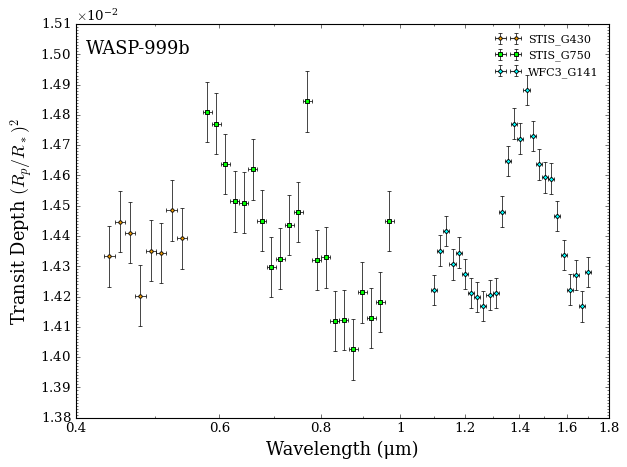

In [2]:
from POSEIDON.core import load_data, wl_grid_constant_R
from POSEIDON.visuals import plot_data

#***** Model wavelength grid *****#

wl_min = 0.4      # Minimum wavelength (um)
wl_max = 1.8      # Maximum wavelength (um)
R = 4000          # Spectral resolution of grid      

# We need to provide a model wavelength grid to initialise instrument properties
wl = wl_grid_constant_R(wl_min, wl_max, R)

# Specify the STIS and WFC3 Hubble data
data_dir = '../../../../POSEIDON/reference_data/observations/WASP-999b'             
datasets = ['WASP-999b_STIS_G430.dat', 
            'WASP-999b_STIS_G750.dat', 
            'WASP-999b_WFC3_G141.dat']  
instruments = ['STIS_G430', 'STIS_G750', 'WFC3_G141']

# Load dataset, pre-load instrument PSF and transmission function
data = load_data(data_dir, datasets, instruments, wl)

# Plot our data
fig_data = plot_data(data, planet_name)

In [3]:
from POSEIDON.core import define_model

#***** Define model *****#

model_name_1 = 'My_first_retrieval'  # Model name used for plots, output files etc.

bulk_species = ['H2', 'He']     # H2 + He comprises the bulk atmosphere
param_species = ['H2O']         # The only trace gas is H2O

# Create the model object
model_1 = define_model(model_name_1, bulk_species, param_species, 
                     PT_profile = 'isotherm', cloud_model = 'cloud-free')

# Check the free parameters defining this model
print("Free parameters: " + str(model_1['param_names']))

#***** Define model *****#

model_name_2 = 'Improved_retrieval'

bulk_species = ['H2', 'He']     
param_species_2 = ['Na', 'K', 'TiO', 'H2O']  # Three new chemical species added

# Create the model object
model_2 = define_model(model_name_2, bulk_species, param_species_2, 
                       PT_profile = 'isotherm', cloud_model = 'cloud-free')

# Check the free parameters defining this model
print("Free parameters: " + str(model_2['param_names']))

Free parameters: ['R_p_ref' 'T' 'log_H2O']
Free parameters: ['R_p_ref' 'T' 'log_Na' 'log_K' 'log_TiO' 'log_H2O']


# Fancy plots

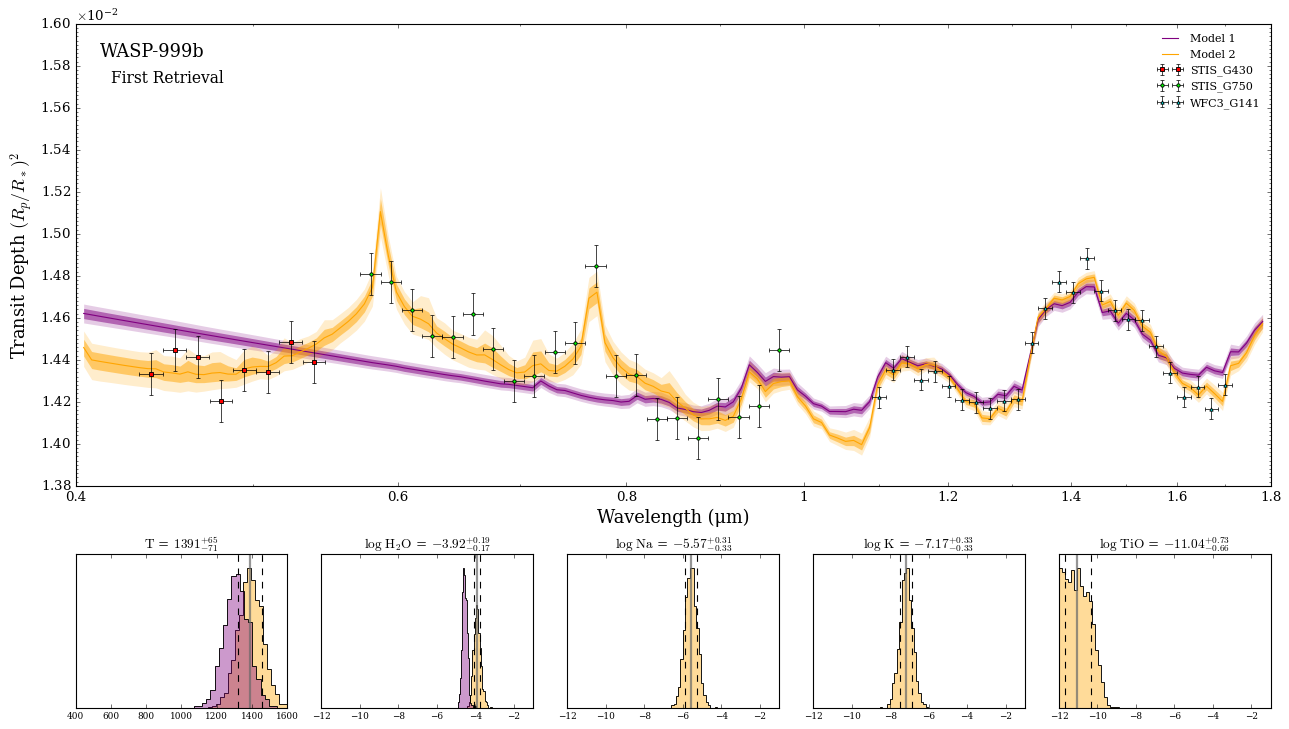

<Figure size 853.36x480 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

In [4]:
from POSEIDON.visuals import plot_spectra_retrieved
from POSEIDON.utility import read_retrieved_spectrum, plot_collection

# Read retrieved spectrum confidence regions
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_1)

# Plot
# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = [])
spectra_low1 = plot_collection(spec_low1, wl, collection = []) 
spectra_low2 = plot_collection(spec_low2, wl, collection = []) 
spectra_high1 = plot_collection(spec_high1, wl, collection = []) 
spectra_high2 = plot_collection(spec_high2, wl, collection = [])

wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_2)

# Plot
# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = spectra_median)
spectra_low1 = plot_collection(spec_low1, wl, collection = spectra_low1) 
spectra_low2 = plot_collection(spec_low2, wl, collection = spectra_low2) 
spectra_high1 = plot_collection(spec_high1, wl, collection = spectra_high1) 
spectra_high2 = plot_collection(spec_high2, wl, collection = spectra_high2)

#***** Plotting magic *****#

import matplotlib.pyplot as plt
from POSEIDON.visuals import plot_histograms

fig_combined = plt.figure(constrained_layout=True, figsize=(16, 9))  

# This function is the magic. Each letter corresponds to one matplotlib axis, which you can then pass to POSEIDON's plotting functions
axd = fig_combined.subplot_mosaic(
    """
    AAAAA
    AAAAA
    AAAAA
    abcde
    """
)

# Plot the spectra in A
ax_spectrum = axd["A"]

model_1_color = 'purple'
model_2_color = 'orange'


# Produce figure

_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                        spectra_high1, spectra_high2, planet_name,
                        data, R_to_bin = 100, show_ymodel = False,
                        colour_list = [model_1_color, model_2_color], 
                        plt_label = 'First Retrieval',
                        spectra_labels = ['Model 1', 'Model 2'],
                        data_colour_list = ['red', 'lime','cyan'],
                        data_marker_list = ['s','o','^'], data_marker_size_list = [3,3,3],
                        figure_shape = 'wide', save_fig = False,
                        ax = ax_spectrum,
                        sigma_to_plot = 2,
                        data_labels = ['STIS_G430', 'STIS_G750', 'WFC3_G141'],
                        y_unit = 'transit_depth',
                        legend_location = 'upper right',
                        )

# Plot the histograms on a,b,c,d,e

# Shared parameteres in a and b 
# When using more than one model, use retrieval_colour_list 
# Also, the span is usually whatever the prior range was 
# Note that the first model in models is what the posterior values are shown for

axes_histograms = [axd['a'],axd["b"]]

models = [model_2, model_1]

_ = plot_histograms(planet_name, models, plot_parameters = ['T','log_H2O'], 
                    span = ((400,1600), (-12,-1)),
                    N_bins = [20,20],
                    retrieval_colour_list = [model_2_color, model_1_color],
                    axes = axes_histograms, save_fig = False)

# Non-shared parameteres in the rest 
# When using one model, use parameter_colour_list 

axes_histograms = [axd['c'],axd["d"],axd['e']]

models = [model_2]

_ = plot_histograms(planet_name, models, plot_parameters = ['log_Na','log_K','log_TiO'], 
                    span = ((-12,-1),(-12,-1),(-12,-1)),
                    N_bins = [20,20,20],
                    parameter_colour_list = [model_2_color,model_2_color,model_2_color],
                    axes = axes_histograms, save_fig = False)

# To save the plot, use 
# fig_combined.savefig('name.pdf or name.png', bbox_inches='tight', dpi=800)

# Advanced Plotting

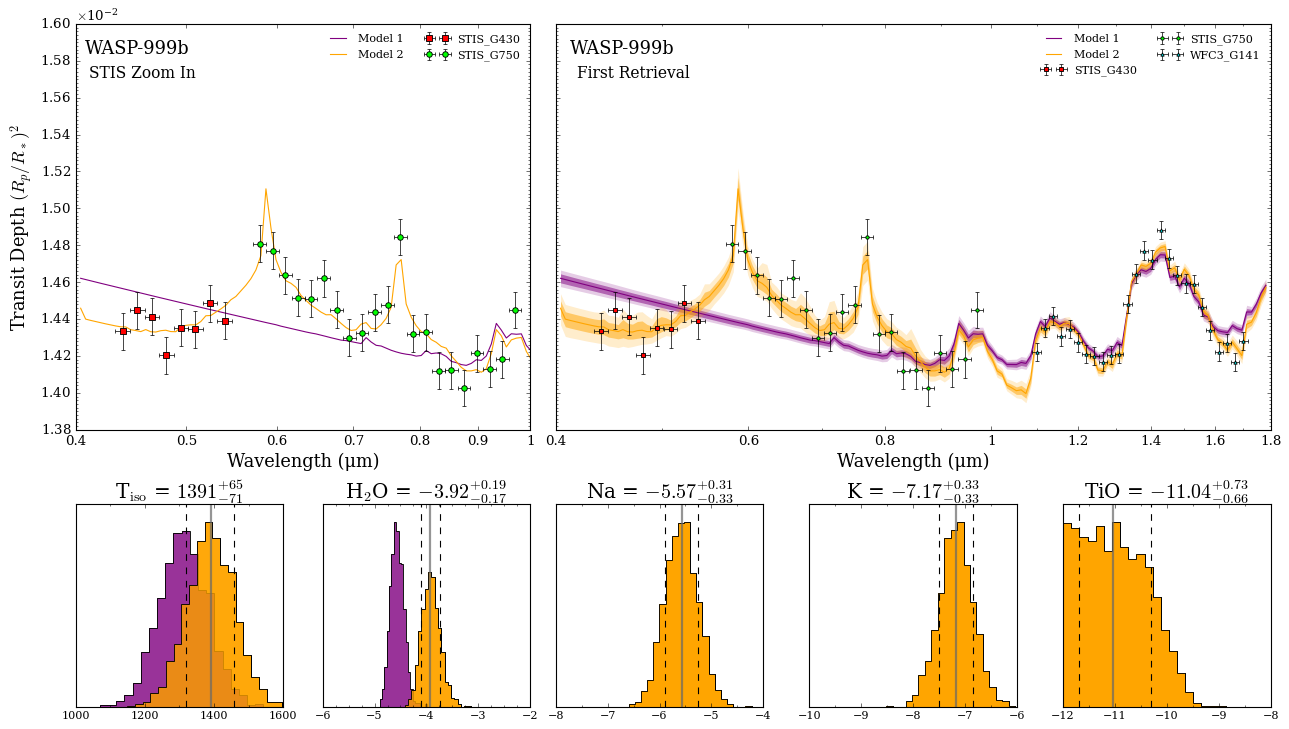

<Figure size 853.36x480 with 0 Axes>

<Figure size 853.36x480 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

In [5]:
from POSEIDON.visuals import plot_spectra_retrieved
from POSEIDON.utility import read_retrieved_spectrum, plot_collection

# Read retrieved spectrum confidence regions
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_1)

# Plot
# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = [])
spectra_low1 = plot_collection(spec_low1, wl, collection = []) 
spectra_low2 = plot_collection(spec_low2, wl, collection = []) 
spectra_high1 = plot_collection(spec_high1, wl, collection = []) 
spectra_high2 = plot_collection(spec_high2, wl, collection = [])

wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_2)

# Plot
# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = spectra_median)
spectra_low1 = plot_collection(spec_low1, wl, collection = spectra_low1) 
spectra_low2 = plot_collection(spec_low2, wl, collection = spectra_low2) 
spectra_high1 = plot_collection(spec_high1, wl, collection = spectra_high1) 
spectra_high2 = plot_collection(spec_high2, wl, collection = spectra_high2)

#***** Plotting magic *****#

import matplotlib.pyplot as plt
from POSEIDON.visuals import plot_histograms

fig_combined = plt.figure(constrained_layout=True, figsize=(16, 9))  

# This function is the magic. Each letter corresponds to one matplotlib axis, which you can then pass to POSEIDON's plotting functions
axd = fig_combined.subplot_mosaic(
    """
    BBAAA
    BBAAA
    abcde
    """
)

# Plot the spectra in A
ax_spectrum = axd["A"]

model_1_color = 'purple'
model_2_color = 'orange'


# Produce figure with full wavelength range

_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                        spectra_high1, spectra_high2, planet_name,
                        data, R_to_bin = 100, show_ymodel = False,
                        colour_list = [model_1_color, model_2_color], 
                        plt_label = 'First Retrieval',
                        spectra_labels = ['Model 1', 'Model 2'],
                        data_colour_list = ['red', 'lime','cyan'],
                        data_marker_list = ['s','o','^'], data_marker_size_list = [3,3,3],
                        figure_shape = 'wide', save_fig = False,
                        ax = ax_spectrum,
                        sigma_to_plot = 2,
                        data_labels = ['STIS_G430', 'STIS_G750', 'WFC3_G141'],
                        y_unit = 'transit_depth',
                        legend_location = 'upper right',
                        ylabels = False,
                        legend_n_columns = 2
                        )

# Create a zoom in on STIS

# Specify the STIS data
data_dir = '../../../../POSEIDON/reference_data/observations/WASP-999b'             
datasets = ['WASP-999b_STIS_G430.dat','WASP-999b_STIS_G750.dat']  
instruments = ['STIS_G430', 'STIS_G750']

# Load dataset, pre-load instrument PSF and transmission function
data_stis = load_data(data_dir, datasets, instruments, wl)

ax_spectrum = axd["B"]

_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                        spectra_high1, spectra_high2, planet_name,
                        data_stis, R_to_bin = 100, show_ymodel = False,
                        colour_list = [model_1_color, model_2_color], 
                        plt_label = 'STIS Zoom In',
                        spectra_labels = ['Model 1', 'Model 2'],
                        data_colour_list = ['red', 'lime'],
                        data_marker_list = ['s','o'], data_marker_size_list = [5,5],
                        figure_shape = 'wide', save_fig = False,
                        ax = ax_spectrum,
                        sigma_to_plot = 0,
                        data_labels = ['STIS_G430', 'STIS_G750'],
                        y_unit = 'transit_depth',
                        legend_location = 'upper right',
                        wl_min = 0.4, wl_max = 1,
                        legend_n_columns = 2
                        )

# Plot the histograms on a,b,c,d,e

# Shared parameteres in a and b 
# When using more than one model, use retrieval_colour_list 
# Pro tip, the parameters are plotted in order, so if you want one on top of the others, put it last in the list
# We also show tick_labelsize, tick_fontsize, and custom_labels
# Custom ticks is a list of [[MajorTick, MinorTick]] for each parameter

axes_histograms = [axd['a'],axd["b"]]

models = [model_2, model_1, model_2]

_ = plot_histograms(planet_name, models, plot_parameters = ['T','log_H2O'], 
                    span = ((1000,1600), (-6,-2)),
                    N_bins = [20,20],
                    retrieval_colour_list = [model_2_color, model_1_color, model_2_color],
                    axes = axes_histograms, save_fig = False,
                    tick_labelsize = 10, title_fontsize = 18,
                    custom_labels = ['T$_{\mathrm{iso}}$', 'H$_2$O'],
                    custom_ticks = [[200,100], [1,0.25]],
                    alpha_hist = 0.8)

# Non-shared parameteres in the rest 
# When using one model, use parameter_colour_list 

axes_histograms = [axd['c'],axd["d"],axd['e']]

# Plotted twice to have consistent color
models = [model_2,model_2]

_ = plot_histograms(planet_name, models, plot_parameters = ['log_Na','log_K','log_TiO'], 
                    span = ((-8,-4),(-10,-6),(-12,-8)),
                    N_bins = [20,20,20],
                    retrieval_colour_list = [model_2_color,model_2_color],
                    axes = axes_histograms, save_fig = False,
                    tick_labelsize = 10, title_fontsize = 18,
                    custom_labels = ['Na', 'K', 'TiO'],
                    custom_ticks = [[1,0.5],[1,0.5],[1,0.5],],
                    alpha_hist = 1
                    )

# To save the plot, use 
# fig_combined.savefig('name.pdf or name.png', bbox_inches='tight', dpi=800)

# C/O + new overplotted corner plots and other stuff from Ryan 

# Make latex table

In [6]:
from POSEIDON.utility import make_latex_table_from_results

models = [model_name_1, model_name_2]
params = ['T','log_H2O', 'log_Na', 'log_K', 'log_TiO']

make_latex_table_from_results(models, params, planet_name)

T &  $1311.6^{+72.5}_{-68.5}$ &  $1390.8^{+65.6}_{-69.5}$ \\
log_H2O &  $-4.6^{+0.1}_{-0.1}$ &  $-3.9^{+0.2}_{-0.2}$ \\
log_Na &  --- & $-5.6^{+0.3}_{-0.3}$ \\
log_K &  --- & $-7.2^{+0.3}_{-0.3}$ \\
log_TiO &  --- & $-11.0^{+0.7}_{-0.7}$ \\


# Pulling the forward models

Lets pull the forward model so that we can see what the retrieved atmosphere looks like in longer wavelengths 

In [17]:
from POSEIDON.core import load_data, wl_grid_constant_R
from POSEIDON.visuals import plot_data

#***** Model wavelength grid *****#

wl_min = 0.4      # Minimum wavelength (um)
wl_max = 15      # Maximum wavelength (um)
R = 4000          # Spectral resolution of grid      

# We need to provide a model wavelength grid to initialise instrument properties
wl = wl_grid_constant_R(wl_min, wl_max, R)

Load the opacity object so that the forward models can be plotted

In [18]:
from POSEIDON.core import read_opacities
import numpy as np

#***** Specify fixed atmospheric settings from retrieval *****#

# Atmospheric pressure grid
P_min = 1.0e-7    # 0.1 ubar
P_max = 100       # 100 bar
N_layers = 100    # 100 layers

# Let's space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure
P_ref = 10.0   # Retrieved R_p_ref parameter will be the radius at 10 bar

#***** Read opacity data *****#

opacity_treatment = 'opacity_sampling'

# Define fine temperature grid (K)
T_fine_min = 400     # Same as prior range for T
T_fine_max = 1600    # Same as prior range for T
T_fine_step = 10     # 10 K steps are a good tradeoff between accuracy and RAM

T_fine = np.arange(T_fine_min, (T_fine_max + T_fine_step), T_fine_step)

# Define fine pressure grid (log10(P/bar))
log_P_fine_min = -6.0   # 1 ubar is the lowest pressure in the opacity database
log_P_fine_max = 2.0    # 100 bar is the highest pressure in the opacity database
log_P_fine_step = 0.2   # 0.2 dex steps are a good tradeoff between accuracy and RAM

log_P_fine = np.arange(log_P_fine_min, (log_P_fine_max + log_P_fine_step), 
                       log_P_fine_step)

# Pre-interpolate the opacities
opac = read_opacities(model_2, wl, opacity_treatment, T_fine, log_P_fine)

Reading in cross sections in opacity sampling mode...
H2-H2 done
H2-He done
Na done
K done
TiO done
H2O done
Opacity pre-interpolation complete.


Pull the median atmosphere object using the get_retrieved_atmosphere function

In [19]:
from POSEIDON.retrieval import get_retrieved_atmosphere

atmosphere_2_median = get_retrieved_atmosphere(planet, model_2, P, P_ref_set = P_ref)

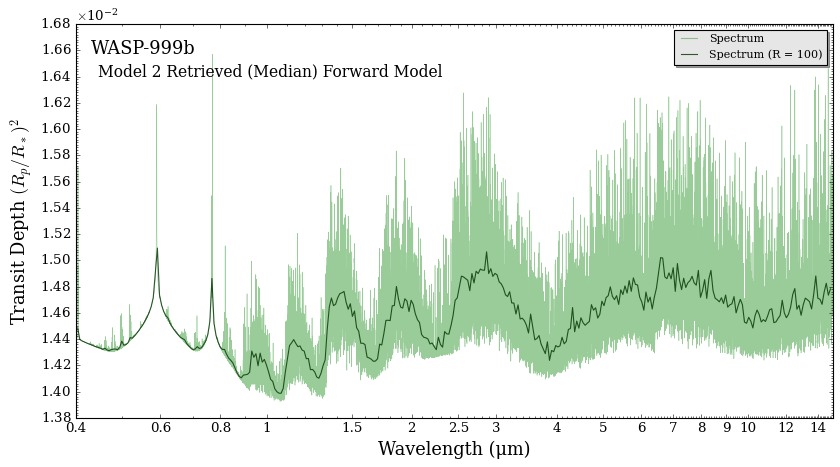

In [20]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

# Generate spectrum
spectrum_median = compute_spectrum(planet, star, model_2, atmosphere_2_median, opac, wl,
                                      spectrum_type = 'transmission')
# Plot spectrum
spectra = plot_collection(spectrum_median, wl, collection = [])

fig = plot_spectra(spectra, planet, R_to_bin = 100,
                   plt_label = 'Model 2 Retrieved (Median) Forward Model',
                   save_fig = False,
                   figure_shape = 'wide') 

The function 'get_retrieved_atmosphere' will pull the median retrieved values by default. One can also pull the best fit.

The verbose optional argument will print out the PT, log_X, cloud, and geometry params for the output atmosphere objects.

In [21]:
from POSEIDON.retrieval import get_retrieved_atmosphere

print('Median atmosphere')
atmosphere_2_median = get_retrieved_atmosphere(planet, model_2, P, P_ref_set = P_ref, median = True, verbose = True)
print()
print('Best-Fit atmosphere')
atmosphere_2_bestfit = get_retrieved_atmosphere(planet, model_2, P, P_ref_set = P_ref, median = False, best_fit = True, verbose = True)

Median atmosphere
R_p_ref =  1.3039356287362254 *  R_J
PT_params = np.array( [1390.8399768615102] )
log_X_params = np.array( [-5.576575090879877, -7.1822747395536375, -11.034657429126623, -3.925671169652905] )
cloud_params = np.array( [] )
geometry_params = np.array( [] )

Best-Fit atmosphere
R_p_ref =  1.3039539769781165 *  R_J
PT_params = np.array( [1378.9488794972872] )
log_X_params = np.array( [-5.483149145322625, -7.099385703384315, -11.293548481549795, -3.892754112412364] )
cloud_params = np.array( [] )
geometry_params = np.array( [] )


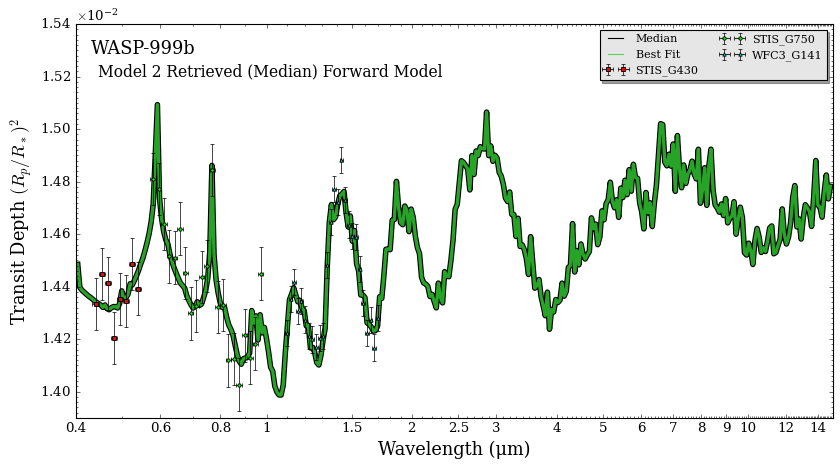

In [22]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

# Generate spectrum
spectrum_median = compute_spectrum(planet, star, model_2, atmosphere_2_median, opac, wl,
                                      spectrum_type = 'transmission')

spectrum_bestfit = compute_spectrum(planet, star, model_2, atmosphere_2_median, opac, wl,
                                      spectrum_type = 'transmission')
# Plot spectrum
spectra = []
spectra = plot_collection(spectrum_median, wl, collection = spectra)
spectra = plot_collection(spectrum_bestfit, wl, collection = spectra)

fig = plot_spectra(spectra, planet, data_properties = data, R_to_bin = 100, 
                   plot_full_res = False, show_data = True,
                   plt_label = 'Model 2 Retrieved (Median) Forward Model',
                   spectra_labels = ['Median', 'Best Fit'],
                   line_widths = [5,3], line_styles = ['-', '-'], alphas = [1, 0.8],
                   colour_list = ['black', 'limegreen'],
                   data_colour_list = ['red', 'lime','cyan'],
                   data_marker_list = ['s','o','^'], data_marker_size_list = [3,3,3],
                   data_labels = ['STIS_G430', 'STIS_G750', 'WFC3_G141'],
                   legend_n_columns = 2,
                   save_fig = False,
                   figure_shape = 'wide',
                   y_max = 1.54e-2, y_min = 1.39e-2) 

The best fit and median spectra are very similar. Lets see what changes when we add TiO to the forward model

In [23]:
from POSEIDON.retrieval import get_retrieved_atmosphere

print('Median atmosphere')
atmosphere_2_median = get_retrieved_atmosphere(planet, model_2, P, P_ref_set = P_ref, median = True, verbose = True)

Median atmosphere
R_p_ref =  1.3039356287362254 *  R_J
PT_params = np.array( [1390.8399768615102] )
log_X_params = np.array( [-5.576575090879877, -7.1822747395536375, -11.034657429126623, -3.925671169652905] )
cloud_params = np.array( [] )
geometry_params = np.array( [] )


In [24]:
from POSEIDON.core import make_atmosphere

R_p_ref =  1.3039356287362254 *  R_J

PT_params = np.array([1390.8399768615102])

# Same order as the ['Na', 'K', 'TiO', 'H2O']
log_X_params = np.array( [-5.576575090879877, -7.1822747395536375, -11.034657429126623, -3.925671169652905] )

# Lets redefine TiO to be a higher abundance 
log_X_params = np.array( [-5.576575090879877, -7.1822747395536375, -7, -3.925671169652905])

atmosphere_high_TiO = make_atmosphere(planet, model_2, P, P_ref, R_p_ref, PT_params, log_X_params)

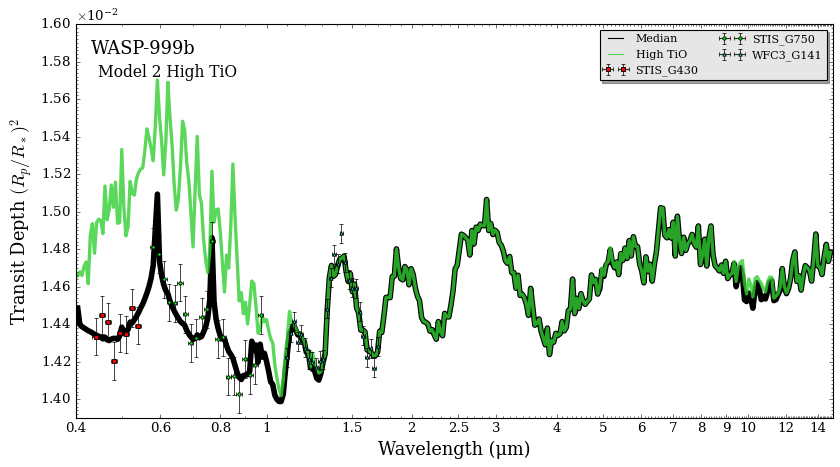

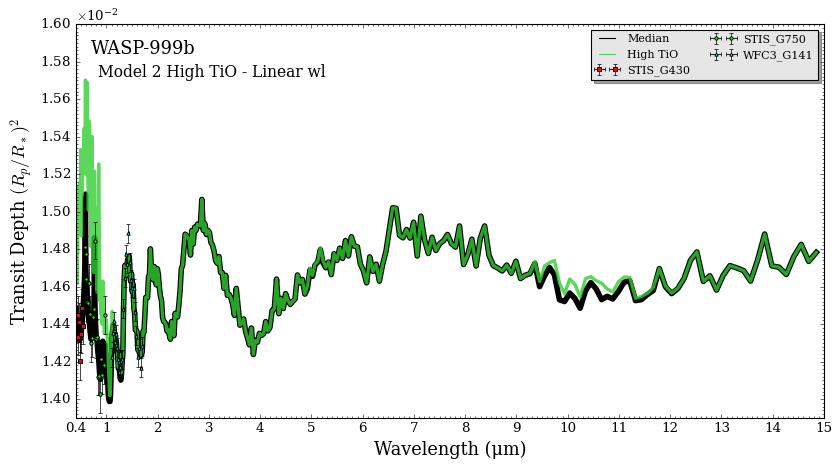

In [30]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

# Generate spectrum
spectrum_median = compute_spectrum(planet, star, model_2, atmosphere_2_median, opac, wl,
                                      spectrum_type = 'transmission')

spectrum_high_TiO = compute_spectrum(planet, star, model_2, atmosphere_high_TiO, opac, wl,
                                      spectrum_type = 'transmission')
# Plot spectrum
spectra = []
spectra = plot_collection(spectrum_median, wl, collection = spectra)
spectra = plot_collection(spectrum_high_TiO, wl, collection = spectra)

fig = plot_spectra(spectra, planet, data_properties = data, R_to_bin = 100, 
                   plot_full_res = False, show_data = True,
                   plt_label = 'Model 2 High TiO',
                   spectra_labels = ['Median', 'High TiO'],
                   line_widths = [5,3], line_styles = ['-', '-'], alphas = [1, 0.8],
                   colour_list = ['black', 'limegreen'],
                   data_colour_list = ['red', 'lime','cyan'],
                   data_marker_list = ['s','o','^'], data_marker_size_list = [3,3,3],
                   data_labels = ['STIS_G430', 'STIS_G750', 'WFC3_G141'],
                   legend_n_columns = 2,
                   save_fig = False,
                   figure_shape = 'wide',
                   y_max = 1.60e-2, y_min = 1.39e-2) 

fig = plot_spectra(spectra, planet, data_properties = data, R_to_bin = 100, 
                   plot_full_res = False, show_data = True,
                   plt_label = 'Model 2 High TiO - Linear wl',
                   spectra_labels = ['Median', 'High TiO'],
                   line_widths = [5,3], line_styles = ['-', '-'], alphas = [1, 0.8],
                   colour_list = ['black', 'limegreen'],
                   data_colour_list = ['red', 'lime','cyan'],
                   data_marker_list = ['s','o','^'], data_marker_size_list = [3,3,3],
                   data_labels = ['STIS_G430', 'STIS_G750', 'WFC3_G141'],
                   legend_n_columns = 2,
                   save_fig = False,
                   figure_shape = 'wide', wl_axis = 'linear',
                   y_max = 1.60e-2, y_min = 1.39e-2) 